In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [ ]:
def init_params():
  W1 = np.random.rand(2, 2)
  b1 = np.random.rand(2, 1)
  W2 = np.random.rand(1, 2)
  b2 = np.random.rand()
  return W1, b1, W2, b2

In [ ]:
def ReLu(Z):
  return np.maximum(Z, 0)

In [ ]:
def sigmoid(Z):
  return 1 / (1 + np.exp(-Z))

In [ ]:
def forward_prop(W1, b1, W2, b2, X):
  Z1 = W1 @ X + b1
  A1 = ReLu(Z1)
  Z2 = W2 @ A1 + b2
  A2 = sigmoid(Z2)
  return Z1, A1, Z2, A2

In [ ]:
def loss_mse(Y_pred, Y):
    return 0.5 * np.sum((Y_pred - Y) ** 2)

In [ ]:
def ReLU_deriv(Z):
    return Z > 0

In [ ]:
def sigmoid_deriv(A):
  return A * (1 - A)

In [ ]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
  dZ2 = (A2 - Y) * sigmoid_deriv(A2)
  dW2 = dZ2 @ A1.T
  db2 = dZ2
  dZ1 = (W2.T @ dZ2) * ReLU_deriv(Z1)
  dW1 = dZ1 @ X.T
  db1 = dZ1
  return dW1, db1, dW2, db2

In [ ]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [ ]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    n_samples = X.shape[0]
    loss_history = []

    for i in range(iterations):
      for j in range(n_samples):
          x = X[j].reshape(-1, 1) # shape (2,1)
          y = Y[j].reshape(-1, 1) # shape (1,1)

          Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, x)

          loss = loss_mse(A2, y)
          loss_history.append(loss)

          dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, x, y)
          W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

    return W1, b1, W2, b2, loss_history

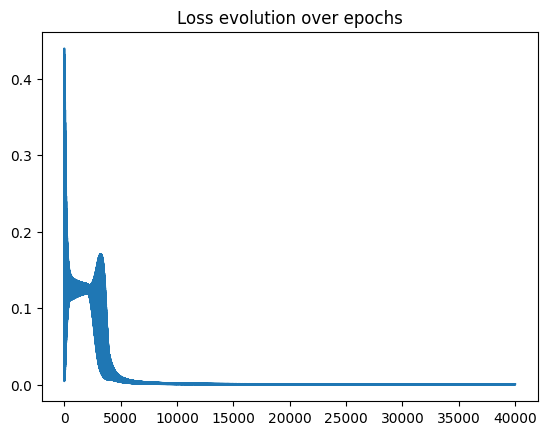

In [ ]:
W1, b1, W2, b2, losses = gradient_descent(X, y, alpha=0.1, iterations=10000)

plt.plot(losses)
plt.title("Loss evolution over epochs")
plt.show()

In [ ]:
def predict(x):
  _, _, _, A2 = forward_prop(W1, b1, W2, b2, x)
  return A2

In [ ]:
predict(np.array([[0], [1]]))

array([[0.98479996]])

In [ ]:
predict(np.array([[0], [0]]))

array([[0.03219009]])

In [ ]:
predict(np.array([[1], [0]]))

array([[0.98479103]])

In [ ]:
predict(np.array([[1], [1]]))

array([[0.01265191]])